Colab acess link :https://colab.research.google.com/drive/1wtqLrg1PY9f-08c_xK-S4IL61vuZ-9px?usp=sharing

**Problem Statment:**

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

##Importing required Header

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Download and load the Data

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
df=pd.read_csv("/content/netflix.csv")

--2025-08-23 14:45:49--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.172.139.61, 18.172.139.46, 18.172.139.94, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.172.139.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘netflix.csv.2’

netflix.csv.2       100%[===================>]   3.24M  --.-KB/s    in 0.09s   

2025-08-23 14:45:50 (37.7 MB/s) - ‘netflix.csv.2’ saved [3399671/3399671]



### 2. Basic Data Analyis

In [ ]:
## The shape of the data?

df.shape

(8807, 12)

In [ ]:
## First 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
## is all my Data unique
df.nunique()

,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
## checking for null values in every column
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
# all of the rows in showid,title are unique while othere are not
# there are null values in  director,cast,country,date_added,rating,duration

## Analysing Type Column

In [ ]:
#Analysing The Type column
df['type'].value_counts(normalize=True) *100

,proportion
type,
Movie,69.615079
TV Show,30.384921


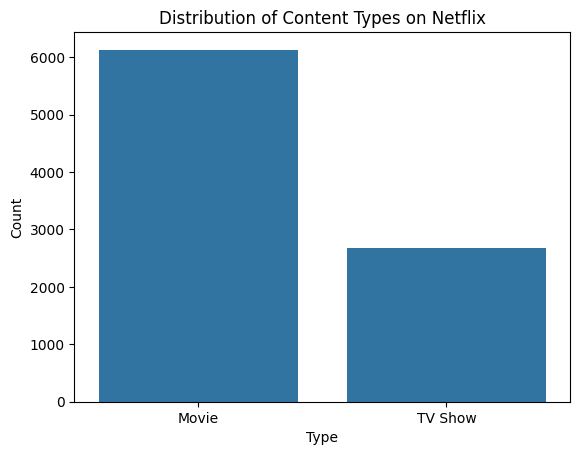

In [ ]:
# Visual representation of Type column
sns.countplot(data=df, x='type')
plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

## Analysing the country Column

In [ ]:
country_counts = df['country'].value_counts()
print("\nContent Availability by Country:")
country_counts


Content Availability by Country:


,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
...,...
"Mexico, United States, Spain, Colombia",1
"Canada, Norway",1
"Finland, Germany, Belgium",1


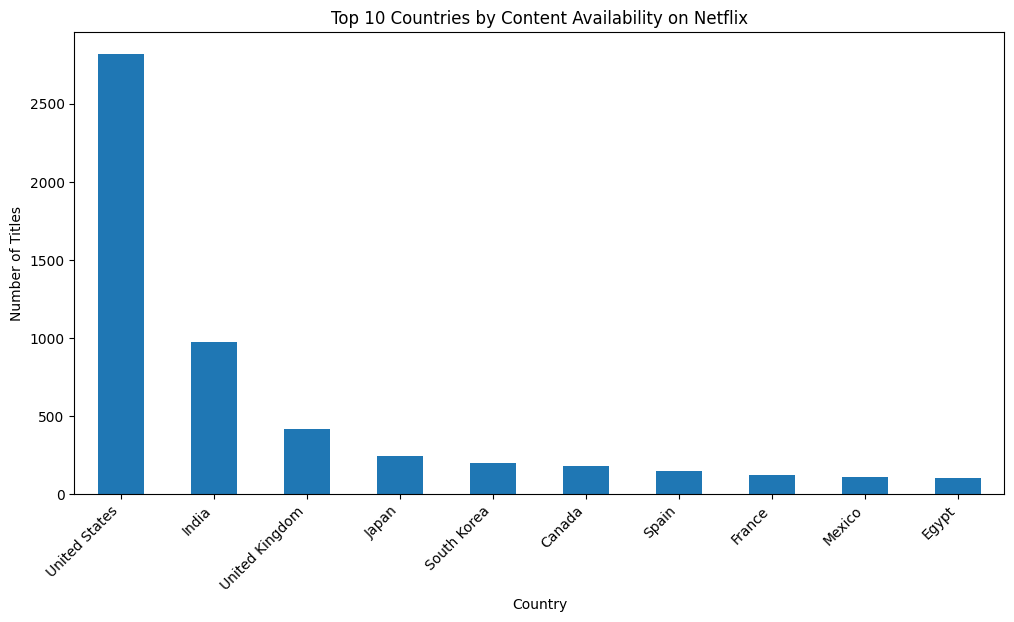

In [ ]:
plt.figure(figsize=(12, 6))
country_counts.head(10).plot(kind='bar')
plt.title('Top 10 Countries by Content Availability on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.show()

## Analysing Date and time

In [ ]:
#converting Date_ added to datetime Format adn extracting day,month,year,day of week
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')
df['day_added'] = df['date_added'].dt.day
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df['day_of_week_added'] = df['date_added'].dt.dayofweek

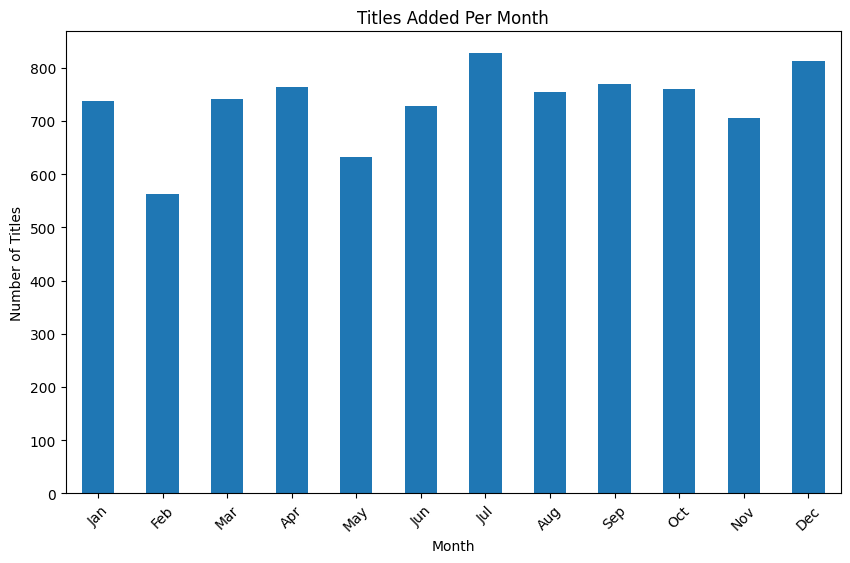

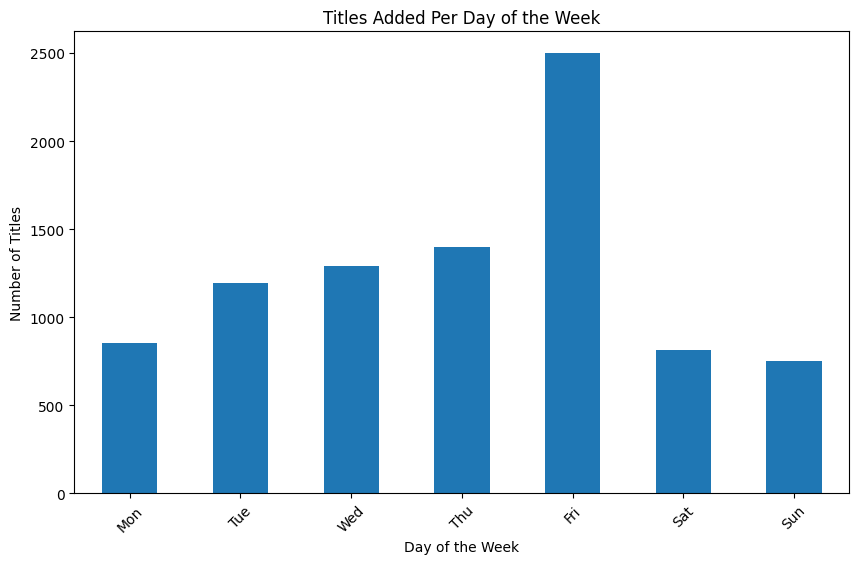

In [ ]:
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar')
plt.title('Titles Added Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
daily_counts.plot(kind='bar')
plt.title('Titles Added Per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Titles')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()

## Analyze content trends over time

In [ ]:
#Examine how the number of movies and TV shows released per year has changed over time

df_filtered = df[['type', 'release_year']]
content_over_time = df_filtered.groupby(['release_year', 'type']).size().unstack(fill_value=0)
content_over_time_sorted = content_over_time.sort_index()
content_over_time_sorted

type,Movie,TV Show
release_year,,
1925,0,1
1942,2,0
1943,3,0
1944,3,0
1945,3,1
...,...,...
2017,767,265
2018,767,380
2019,633,397


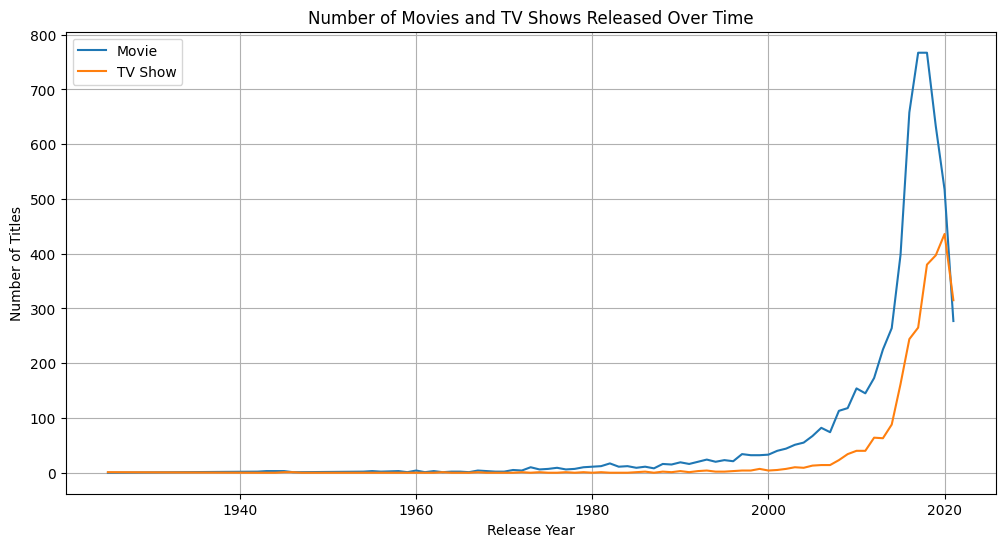

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(content_over_time_sorted.index, content_over_time_sorted['Movie'], label='Movie')
plt.plot(content_over_time_sorted.index, content_over_time_sorted['TV Show'], label='TV Show')
plt.title('Number of Movies and TV Shows Released Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.grid(True)
plt.show()

## Analyze content characteristics

### Subtask:
Investigate characteristics like duration, rating, and listed genres for both movies and TV shows.


Movie Duration Analysis:


<>:21: SyntaxWarning: invalid escape sequence '\d'
<>:21: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-17215503.py:21: SyntaxWarning: invalid escape sequence '\d'
  tv_shows_df['duration_numeric'] = tv_shows_df['duration'].str.extract('(\d+)', expand=False).astype(float)


,duration_numeric
count,6128.000000
mean,99.577187
std,28.290593
min,3.000000
25%,87.000000
50%,98.000000
75%,114.000000
max,312.000000


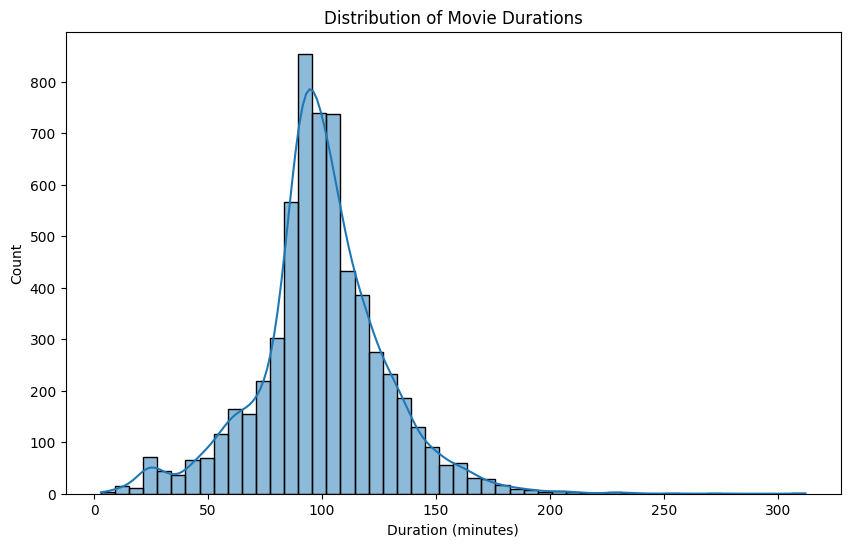


TV Show Duration (Seasons) Analysis:


,duration_numeric
count,2676.000000
mean,1.764948
std,1.582752
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,17.000000


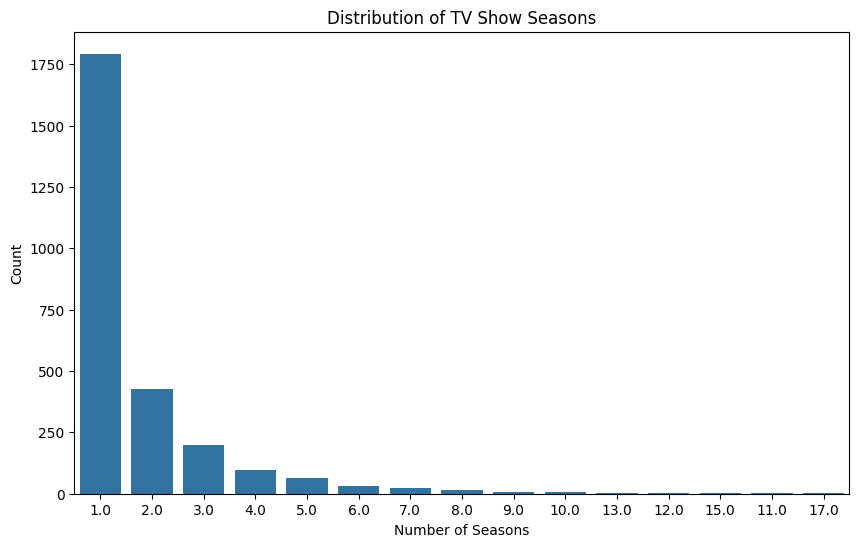


Rating Distribution Analysis:
Movie Ratings:


,count
rating,
TV-MA,2062
TV-14,1427
R,797
TV-PG,540
PG-13,490
PG,287
TV-Y7,139
TV-Y,131
TV-G,126



TV Show Ratings:


,count
rating,
TV-MA,1145
TV-14,733
TV-PG,323
TV-Y7,195
TV-Y,176
TV-G,94
NR,5
R,2
TV-Y7-FV,1


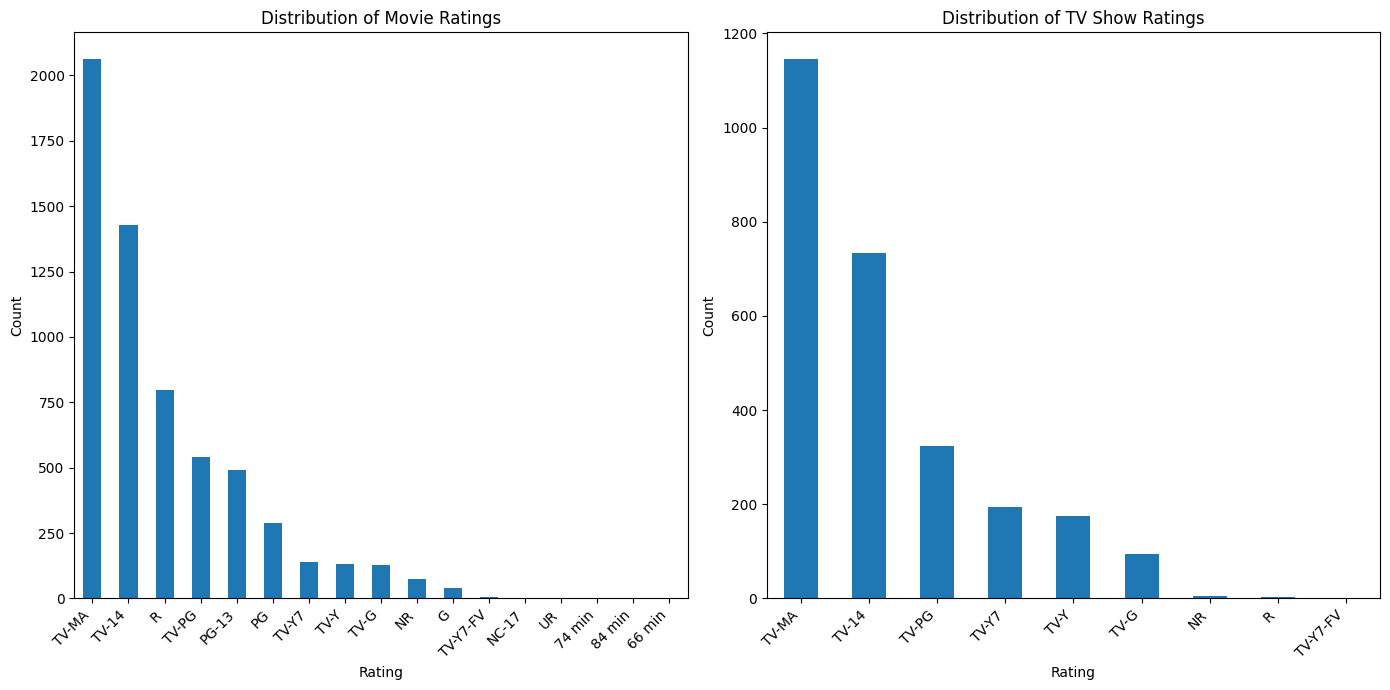


Genre Distribution Analysis:

Top 10 Movie Genres:


,count
listed_in,
International Movies,2752
Dramas,2427
Comedies,1674
Documentaries,869
Action & Adventure,859
Independent Movies,756
Children & Family Movies,641
Romantic Movies,616
Thrillers,577



Top 10 TV Show Genres:


,count
listed_in,
International TV Shows,1351
TV Dramas,763
TV Comedies,581
Crime TV Shows,470
Kids' TV,451
Docuseries,395
Romantic TV Shows,370
Reality TV,255
British TV Shows,253


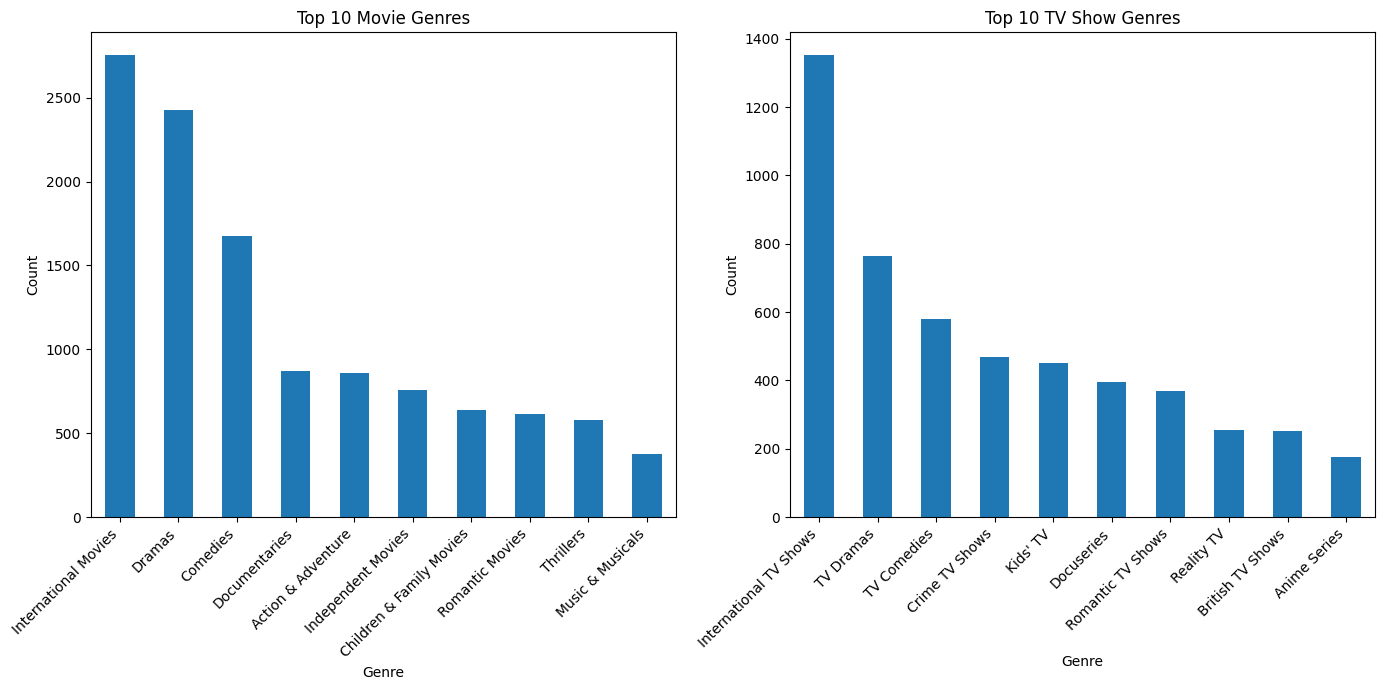

In [ ]:
# Separate movies and TV shows
movies_df = df[df['type'] == 'Movie'].copy()
tv_shows_df = df[df['type'] == 'TV Show'].copy()

# 1. Analyze movie duration
print("Movie Duration Analysis:")
# Convert duration to numeric (removing ' min')
movies_df['duration_numeric'] = movies_df['duration'].str.replace(' min', '', regex=False).astype(float)
display(movies_df['duration_numeric'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(movies_df['duration_numeric'], bins=50, kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

# 2. Analyze TV show duration (seasons)
print("\nTV Show Duration (Seasons) Analysis:")
# Extract the number of seasons using regex and convert to float
tv_shows_df['duration_numeric'] = tv_shows_df['duration'].str.extract('(\d+)', expand=False).astype(float)
display(tv_shows_df['duration_numeric'].describe())

plt.figure(figsize=(10, 6))
# Use countplot for discrete number of seasons
sns.countplot(data=tv_shows_df, x='duration_numeric', order=tv_shows_df['duration_numeric'].value_counts().index)
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()


# 3. Analyze rating distribution
print("\nRating Distribution Analysis:")
print("Movie Ratings:")
movie_ratings = movies_df['rating'].value_counts()
display(movie_ratings)

print("\nTV Show Ratings:")
tv_show_ratings = tv_shows_df['rating'].value_counts()
display(tv_show_ratings)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
movie_ratings.plot(kind='bar')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
tv_show_ratings.plot(kind='bar')
plt.title('Distribution of TV Show Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# 4. Analyze genre distribution ('listed_in')
print("\nGenre Distribution Analysis:")

# Function to count genres
def count_genres(df, content_type):
    genres = df['listed_in'].str.split(', ').explode()
    genre_counts = genres.value_counts()
    print(f"\nTop 10 {content_type} Genres:")
    display(genre_counts.head(10))
    return genre_counts

movie_genre_counts = count_genres(movies_df, 'Movie')
tv_show_genre_counts = count_genres(tv_shows_df, 'TV Show')

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
movie_genre_counts.head(10).plot(kind='bar')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
tv_show_genre_counts.head(10).plot(kind='bar')
plt.title('Top 10 TV Show Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Analyze key contributors

### Subtask:
Explore the most frequent actors and directors and their associated content types and popularity.

Top 10 Directors:


,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Martin Scorsese,12
Youssef Chahine,12
Jay Chapman,12


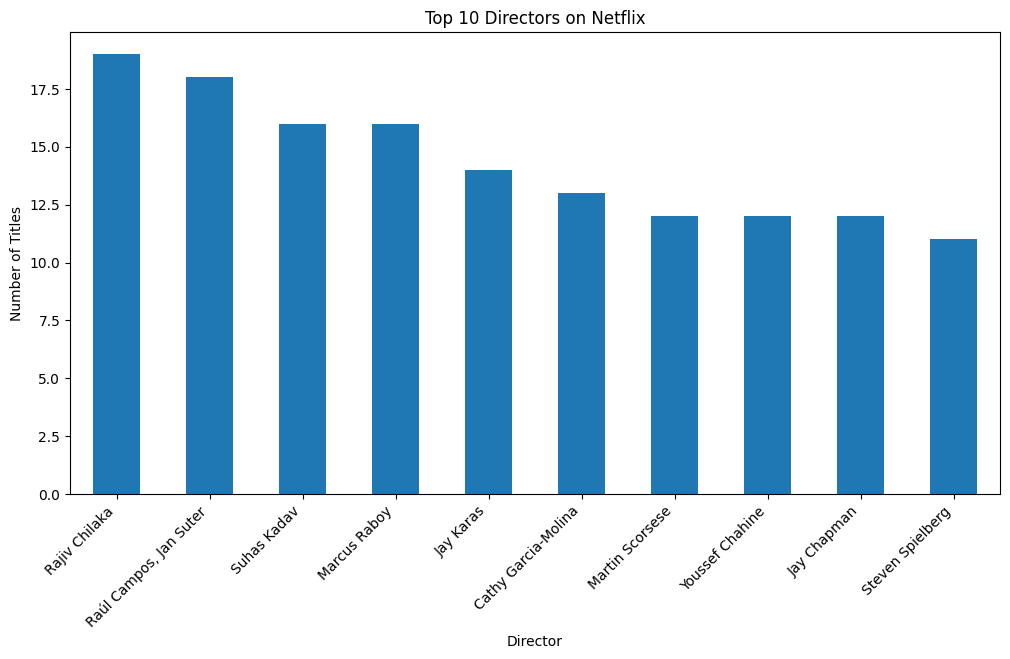

In [ ]:
# Count the occurrences of each director, dropping rows with missing values
director_counts = df['director'].value_counts().dropna()

print("Top 10 Directors:")
# Display the top 10 director counts in a table
display(director_counts.head(10))

# Plot the top 10 most frequent directors
plt.figure(figsize=(12, 6))
director_counts.head(10).plot(kind='bar')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.show()

Top 10 Actors in Movies:


,count
cast,
Anupam Kher,42
Shah Rukh Khan,35
Naseeruddin Shah,32
Akshay Kumar,30
Om Puri,30
Paresh Rawal,28
Julie Tejwani,28
Amitabh Bachchan,28
Boman Irani,27


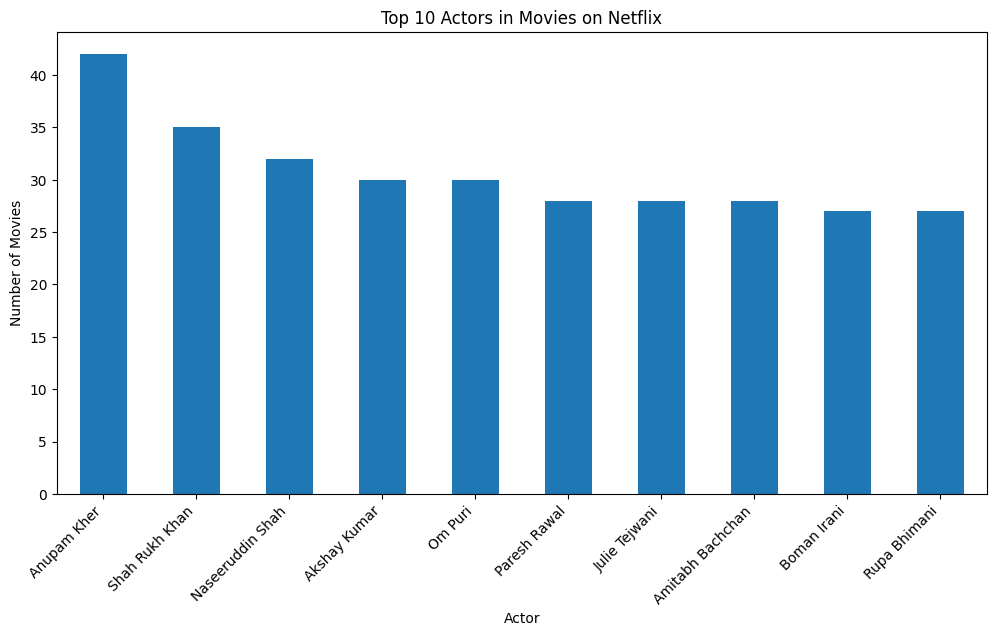

In [ ]:
# Filter the DataFrame to include only movies and drop rows with missing cast information
movies_df_cast = df[df['type'] == 'Movie'].dropna(subset=['cast'])

# Split the 'cast' column and count the occurrences of each actor in movies
movie_actors = movies_df_cast['cast'].str.split(', ').explode()
movie_actor_counts = movie_actors.value_counts()

print("Top 10 Actors in Movies:")
# Display the top 10 movie actor counts in a table
display(movie_actor_counts.head(10))

# Plot the top 10 most frequent movie actors
plt.figure(figsize=(12, 6))
movie_actor_counts.head(10).plot(kind='bar')
plt.title('Top 10 Actors in Movies on Netflix')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

Top 10 Actors in TV Shows:


,count
cast,
Takahiro Sakurai,25
Yuki Kaji,19
Ai Kayano,17
Daisuke Ono,17
Junichi Suwabe,17
Yuichi Nakamura,16
Yoshimasa Hosoya,15
Jun Fukuyama,15
David Attenborough,14


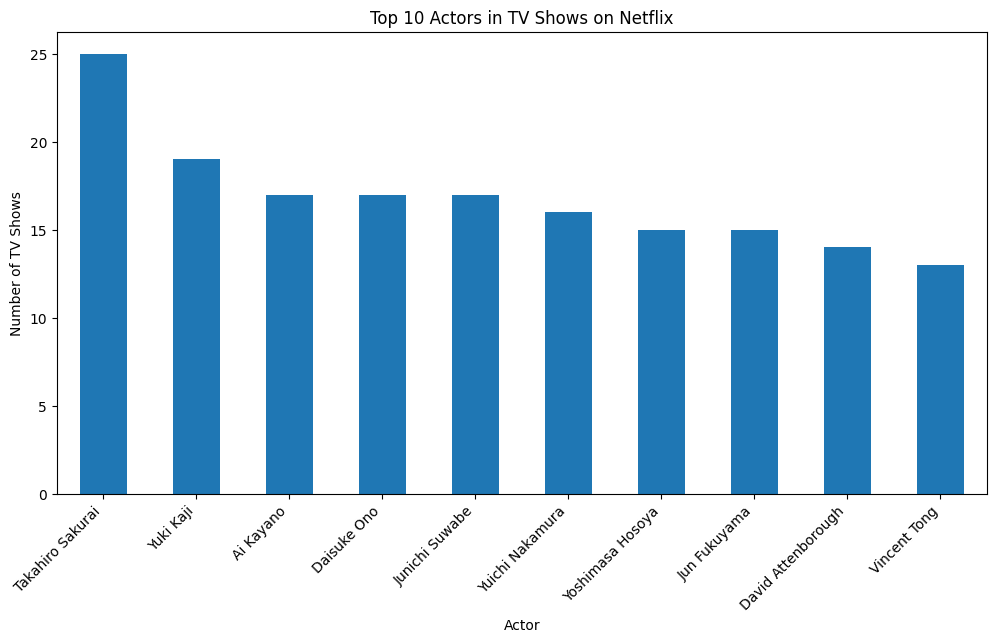

In [ ]:
# Filter the DataFrame to include only TV shows and drop rows with missing cast information
tv_shows_df_cast = df[df['type'] == 'TV Show'].dropna(subset=['cast'])

# Split the 'cast' column and count the occurrences of each actor in TV shows
tv_show_actors = tv_shows_df_cast['cast'].str.split(', ').explode()
tv_show_actor_counts = tv_show_actors.value_counts()

print("Top 10 Actors in TV Shows:")
# Display the top 10 TV show actor counts in a table
display(tv_show_actor_counts.head(10))

# Plot the top 10 most frequent TV show actors
plt.figure(figsize=(12, 6))
tv_show_actor_counts.head(10).plot(kind='bar')
plt.title('Top 10 Actors in TV Shows on Netflix')
plt.xlabel('Actor')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45, ha='right')
plt.show()

## Insights


Based on the analysis, here are some key insights:

* All of the rows in `show_id` and `title` are unique, while other columns have duplicate values.
* There are null values in the `director`, `cast`, `country`, `date_added`, `rating`, and `duration` columns.
* Approximately 70% of content on Netflix is movies, and the remaining 30% is TV shows.
* The highest number of Netflix audience members are from the United States, followed by India, the United Kingdom, Japan, South Korea, Canada, Spain, France, Mexico, and Egypt.
* It can be observed that the highest number of audience using the platform are during Friday.
* It can be noted that the number of movies and TV shows are increasing over the years. During the last few years, and exceptionally in the year 2021, there was a slight increase in TV shows preference over movies.
* It can be noticed that shows rated as 'TV-MA', 'TV-14', and 'TV-PG' have more audience on the platform.
* Movies with a duration around 90-120 minutes are mostly preferred.
* TV shows with season 1 and season 2 are watched more, and after the 2nd season, most shows see a decrease in audience.
* It is noticed that genres such as 'International Movies', 'Dramas', 'Comedies', and 'International TV Shows' are watched more on Netflix.

## Remarks




Recommendations:
 * Netflix should continue to invest more on TV-Shows, particularly on genres such as International TV-shows, Dramas and Comedies.
 * Increase audience in other countries by bringing in more content tailored to those regions.
 * Invest more in TV-shows with lower number of seasons that have received top ratings and belong to popular genres.
 * Release new shows during Friday since the highest number of audience use the platform on Friday.